SPAM or HAM prediction

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

Generating a color class used to print some messages into the code

In [2]:
class Color:
    BLACK = "\033[30m"
    RED = "\033[31m"
    GREEN = "\033[32m"
    YELLOW = "\033[33m"
    BLUE = "\033[34m"
    MAGENTA = "\033[35m"
    CYAN = "\033[36m"
    WHITE = "\033[37m"
    RESET = "\033[0m"

c = Color()

In [3]:
def launchProgram():
    print(f"{c.CYAN}+++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print(f"{c.CYAN}+              SPAM OR HAM PROJECT                  +")
    print(f"{c.CYAN}+       AML2203 Midterm Project - Group 3           +")
    print(f"{c.CYAN}+++++++++++++++++++++++++++++++++++++++++++++++++++++{c.RESET}\n")

launchProgram()

+++++++++++++++++++++++++++++++++++++++++++++++++++++
+              SPAM OR HAM PROJECT                  +
+       AML2203 Midterm Project - Group 3           +
+++++++++++++++++++++++++++++++++++++++++++++++++++++



Importing data

Dataset used contains 4 columns and 5171 rows and it is showed a preview of the dataset. 

In [4]:
# Load the dataset
df = pd.read_csv("spam_dataset.csv")
print(f"{c.GREEN} Count of Dataset: {c.RESET}\n {df.count()}\n") # Displays the count of records available for a particular field
print(f"{c.GREEN} Info of Dataset: {c.RESET}\n {df.info()}\n") # Displays the information on the data set includes the index number, column name, non-null columns and data type
###To be checked on why the label is displayed at the bottom of the result of df.info()
print(f"{c.GREEN} Data Frame Shape: {c.RESET}\n {df.shape}\n") # Displays the dimension of the data which is 5171 rows and 4 columns
print(f"{c.GREEN} Preview of Dataset: {c.RESET}") # Displays a preview of the dataset
df.head()

 Count of Dataset: 
 id           5171
label        5171
text         5171
label_num    5171
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         5171 non-null   int64 
 1   label      5171 non-null   object
 2   text       5171 non-null   object
 3   label_num  5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB
 Info of Dataset: 
 None

 Data Frame Shape: 
 (5171, 4)

 Preview of Dataset: 


,id,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


Generating a lineal regression graph through “lmplot” with X and Y variables.
X: independent variable on the horizontal axis of the graphic, label is “id”
Y: dependent variable on the vertical axis of the graphic, label is “label_num”
data: dataframe imported. 
Order:  this is the order used in the model of regression lineal. In this case order=2 which means graph will be adjusted to a parabola.
ci: it is established in None for do not draw confident intervals


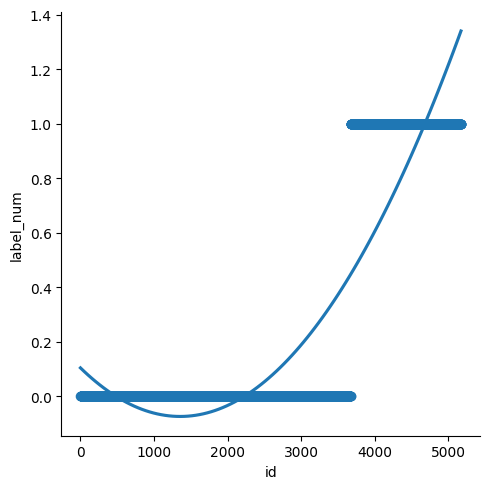

In [5]:
#plotting the Scatter plot to check relationship between label and text
sns.lmplot(x ="id", y ="label_num", data = df, order = 2, ci = None)

Converting text to a vector 

column “text” of the dataframe is converted to a vector using CountVectorizer() from sklearn library, it is to say all of words of each message is converted in a vector to be treated each as independent data.

In [6]:
# Convert the text column into numerical features using the bag-of-words model
vectorizer = CountVectorizer() # Creates an instance of the CountVectorizer class, a tool for converting a collection of text documents into a matrix of token counts
X = vectorizer.fit_transform(df["text"]) # Fits the CountVectorizer to the text data in the "text" column of the df DataFrame and transforms the text data into a sparse matrix of word counts, which is assigned to the variable X

The bag of words model is a way of representing text data in a numerical format for use in machine learning and natural language processing (NLP) tasks. In this model, a piece of text is represented as a bag (or multiset) of its constituent words, with each word treated as a discrete entity.

To create a bag of words representation, the text is first preprocessed to remove punctuation and other irrelevant symbols, and to convert all words to lowercase. Then, each unique word in the text is assigned a numerical index. Finally, for each piece of text, a vector is created where each element corresponds to the count of the corresponding word in the text. The resulting vector is known as the bag of words representation of the text.

A bar chart is generated through plt.bar() function, tha graph shows the frequencies of the terms ordered from highest to lowest. Each bar represents a term and the height of the bar indicates the frequency of that term in the documents.

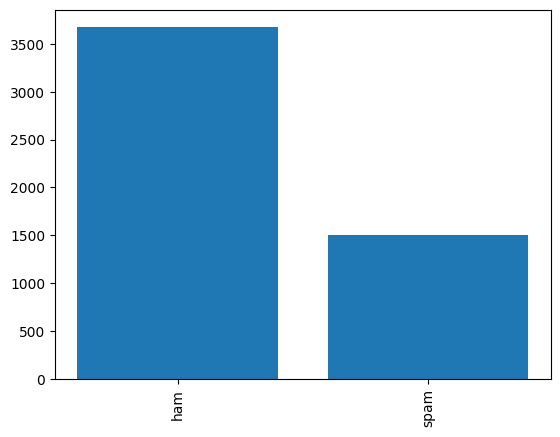

In [7]:
# Extract the text field from the DataFrame into a list
label_count = df['label']

# Create a CountVectorizer object and fit it on the list of text data
vectorizer = CountVectorizer()
X_label = vectorizer.fit_transform(label_count)

# Get the feature names and their frequencies
features = vectorizer.get_feature_names_out()
frequencies = X_label.sum(axis=0).A1

dictionary = dict(zip(features, frequencies)) # tupla with term and frequency

# Sort the dictionary in descending order of frequency
sorted_dict = {k: v for k, v in sorted(dictionary.items(), key=lambda item: item[1], reverse=True)}

# Plot the chart
plt.bar(sorted_dict.keys(), sorted_dict.values())
plt.xticks(rotation=90) 
plt.show()




Selecting 2 first rows of “text” column in the dataframe and posteriorly they are converted in columns.
A graph bar with words of the two first records is generated using plot.bar() function.

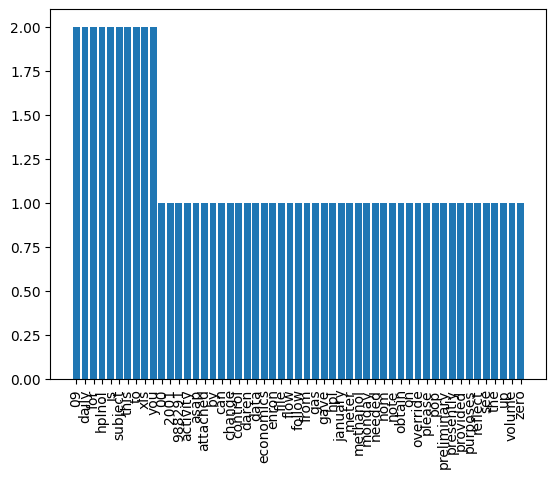

In [8]:
# Extract the text field from the DataFrame into a list
text_count = df['text'][:2].tolist()  # select first 2 records

# Create a CountVectorizer object and fit it on the list of text data
vectorizer = CountVectorizer()
X_text = vectorizer.fit_transform(text_count)

# Get the feature names and their frequencies
features = vectorizer.get_feature_names_out()
frequencies = X_text.sum(axis=0).A1

dictionary = dict(zip(features, frequencies))

# Sort the dictionary in descending order of frequency
sorted_dict = {k: v for k, v in sorted(dictionary.items(), key=lambda item: item[1], reverse=True)}

# Plot the chart
plt.bar(sorted_dict.keys(), sorted_dict.values())
plt.xticks(rotation=90)
plt.show()

Data is split into training and testing sets through train_test_split function. The X matrix contains the input data and  df["label"] is variable target to predict. 0,2 refers to 20% of the data that should be used for testing.


In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df["label"], test_size=0.2)

In [10]:
# Train the model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [11]:
# Predict the label of the test data
y_pred = model.predict(X_test)

Accuracy of the model is calculated comparing real data ‘y_test’ with data predicted ‘y_pred’ using accuracy_score() function and it is indicated utilizing color() function defined previously.   

In [12]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"{c.GREEN} ***Accuracy: {c.RESET} {accuracy}\n")

 ***Accuracy:  0.9826086956521739



Precision of the model is calculated comparing real data ‘y_test’ with data predicted ‘y_pred’ using accuracy_score() function and it is indicated utilizing color() function defined previously.  

In [13]:
# Evaluate the precision score
accuracy = accuracy_score(y_test, y_pred)
precision_macro = precision_score(y_test, y_pred, average='macro')
print(f"{c.GREEN} ***Precision Score (Macro): {c.RESET} {precision_macro}\n")
precision_weighted = precision_score(y_test, y_pred, average='weighted')
print(f"{c.GREEN} ***Precision score (Weighted): {c.RESET} {precision_weighted}\n")

 ***Precision Score (Macro):  0.9787079874190835

 ***Precision score (Weighted):  0.9826086956521739



Both macro and weighted are options for computing the average precision score for multi-class classification problems. The difference between these two options lies in how they handle class imbalance.

Macro: Computes the precision for each class independently and then takes the average of these scores, giving equal weight to each class. This means that the precision for each class is given the same importance, regardless of the number of samples in each class.

Weighted: Computes the average precision score, weighted by the number of samples in each class. This means that the precision score is higher when there are more samples in a class, and lower when there are fewer samples in a class. The precision score is weighted based on the number of samples in each class, so it gives more importance to classes with more samples.

In other words, macro is suitable for use when you want to give equal weight to each class, regardless of the number of samples in each class. weighted is suitable when you want to account for class imbalance and give more weight to classes with more samples.


In [14]:
def evalModel(model, X_train, X_test, y_train, y_test, y_pred): # This method evaluate the Multinomial(NB) model and provide clasification report, confusion matrix and precision score

    print(f"{c.GREEN}***Score: {c.RESET} {model.score(X_test, y_test)}\n")

    # Classification Report without cross-validation
    # For reference on classification matrix https://www.simplilearn.com/tutorials/machine-learning-tutorial/confusion-matrix-machine-learning#:~:text=A%20confusion%20matrix%20presents%20a,actual%20values%20of%20a%20classifier.
    print(f"{c.GREEN}***Classification Report*** {c.RESET}")
    print(classification_report(y_test, y_pred))

evalModel(model, X_train, X_test, y_train, y_test, y_pred) #This method generates the Classification Report

***Score:  0.9826086956521739

***Classification Report*** 
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       739
        spam       0.97      0.97      0.97       296

    accuracy                           0.98      1035
   macro avg       0.98      0.98      0.98      1035
weighted avg       0.98      0.98      0.98      1035



Cross_val_predict() is a function to generate predictions, in this case is a validation of 5 folds, it is to say model is trained 5 times.

A heatmap is generated using sns.heatmap() function of the library seaborn. And through plot() function graph is created and printed.


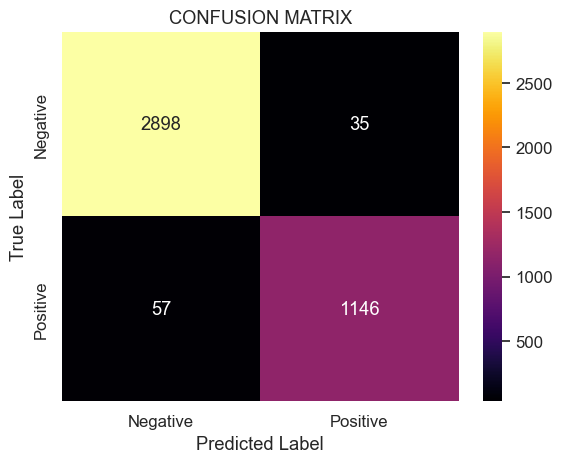

In [15]:
# Generates the predicted labels using cross-validation
y_train_pred = cross_val_predict(model, X_train, y_train, cv=5)

# Generates the Confusion Matrix
cm = confusion_matrix(y_train, y_train_pred)

# Creates the heatmap using Seaborn
sns.set(font_scale=1.1)
sns.heatmap(cm, annot=True, fmt='g', cmap='inferno', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])

# set the axis labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("CONFUSION MATRIX")

# show the plot
plt.show()


In [ ]:

# Split data into input and output columns
X = df['text'] #Contains the email content
y = df['label'] #Y holds the value whether the email content is spam [1] or ham [0]

# Converts the email context into bag of words representation
vectorizer = CountVectorizer() 
X = vectorizer.fit_transform(X)

# Train Logistic Regression Model using scikit.feature_extraction.text
model = LogisticRegression()
model.fit(X,y)



Defining a function to tag the email as SPAM or HAM using email_content and convert it in a vector, in addition color() function is used to print the message.

In [17]:
#Function to tag the mail as Spam or Ham.
def spamOrham(email_content,subject):
    # Using input from user, this converts the content to bag of words using similar approach CountVectorizer used to train the model 
    input_vector = vectorizer.transform([email_content])

    # Predicts if the email is spam or ham
    prediction = model.predict(input_vector)

    if prediction == "spam":
        print(f"Subject : {subject} --> {c.RED} SPAM. {c.RESET}")
    else:
        print(f"Subject : {subject} --> {c.GREEN} HAM. {c.RESET}")

Imaplib is a library to connect with email’s server for searching and downloading messages.
Email is the library to facilitate with components of email messages.
Json library to permit manage Json files.

Data in Json file is read for connecting a gmail account.


In [18]:
import imaplib
import email
import json

data = open('input.json') #Reading json file to get the credentials
creds = json.load(data)


imap_server = creds['imap_server']
email_address = creds['username']
password = creds['password']

In [19]:

imap = imaplib.IMAP4_SSL(imap_server) #Creating connection using gmail imap.

imap.login(email_address, password) #passing the credentials to connect with the desired sccount.

imap.select("Inbox") #Selecting the folder to read emails from.

_, msgnums = imap.search(None, "All") #Searching for emails.


All of fields of email message are examined, these are To, BCC, Date, Subject and content. Posteriorly spamOrham() function is called to evaluate the content and print the result.

In [20]:
#Code to extract different elements of the mail (subject, To, From, etc.) and convert them to text.
for msgnum in msgnums[0].split(): 
    _, data = imap.fetch(msgnum, "(RFC822)")

    message = email.message_from_bytes(data[0][1])

    email_content = f"From: {message.get('From')}\n\
To: {message.get('To')}\n\
BCC: {message.get('BCC')}\n\
Date: {message.get('Date')}\n\
Subject: {message.get('Subject')}\n"
    email_content = str(email_content)
    for part in message.walk():
        if part.get_content_type() == "text/plain":
            email_content = email_content + part.as_string() + "\n"
    subject = message.get('Subject')
    spamOrham(email_content,subject)        
imap.close()

Subject : looking for medication ? we`re the best source -->  SPAM. 
Subject : Reply a chat -->  SPAM. 
Subject : General Announcement - College Closure on Monday, February 20th
 (Family Day) -->  HAM. 


('OK', [b'Returned to authenticated state. (Success)'])